In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sta = pd.read_excel('estacionesSP.xlsx', decimal=',')
sta

,estacion,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin
0,SP000003195,404117,-36781.0000,667.0,MADRID - RETIRO,1920,2023
1,SP000004452,388831,-68292.0000,185.0,BADAJOZ/TALAVERA LA REAL,1955,2023
2,SP000006155,366667,-44881.0000,7.0,MALAGA AEROPUERTO,1942,2023
3,SP000007038,379769,0.7106,1.0,TORREVIEJA,1927,2023
4,SP000008027,433075,-20392.0000,251.0,SAN SEBASTIAN - IGUELDO,1916,2023
...,...,...,...,...,...,...,...
202,SPM00008420,371330,-36170.0000,717.0,GRANADA / ARMILLA,1973,2022
203,SPW00013024,371833,-56000.0000,91.1,MORON DE LA FRONTERA,1958,2023
204,SPW00013025,366500,-63500.0000,27.1,ROTA NAS,1958,2003
205,SPW00014010,416667,-10333.0000,263.0,ZARAGOZA,1957,2023


In [3]:
sta.latitud = sta.latitud/10000

In [4]:
def modificar_valor(valor):
    if -1 < valor < 1:
        return valor
    else:
        return valor / 10000.

sta['longitud'] = sta['longitud'].apply(modificar_valor)

In [5]:
sta

,estacion,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin
0,SP000003195,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
1,SP000004452,38.8831,-6.8292,185.0,BADAJOZ/TALAVERA LA REAL,1955,2023
2,SP000006155,36.6667,-4.4881,7.0,MALAGA AEROPUERTO,1942,2023
3,SP000007038,37.9769,0.7106,1.0,TORREVIEJA,1927,2023
4,SP000008027,43.3075,-2.0392,251.0,SAN SEBASTIAN - IGUELDO,1916,2023
...,...,...,...,...,...,...,...
202,SPM00008420,37.1330,-3.6170,717.0,GRANADA / ARMILLA,1973,2022
203,SPW00013024,37.1833,-5.6000,91.1,MORON DE LA FRONTERA,1958,2023
204,SPW00013025,36.6500,-6.3500,27.1,ROTA NAS,1958,2003
205,SPW00014010,41.6667,-1.0333,263.0,ZARAGOZA,1957,2023


In [6]:
import os
import pandas as pd

carpeta = 'europa/SP'

nombres_columna = ['estacion', 'fecha', 'maxima', 'minima', 'precip', 'nevada', 'profun_nieve']

dfs = []

for archivo in os.listdir(carpeta):
    if archivo.endswith('.csv'):
        ruta_completa = os.path.join(carpeta, archivo)
        
        df = pd.read_csv(ruta_completa, header=None, sep=';')
        
        df.columns = nombres_columna
        
        dfs.append(df)

In [7]:
df = pd.concat(dfs, ignore_index=True)
df

,estacion,fecha,maxima,minima,precip,nevada,profun_nieve
0,SP000003195,1920-01-01,119.0,88.0,0.0,NaN,NaN
1,SP000003195,1920-01-02,110.0,26.0,0.0,NaN,NaN
2,SP000003195,1920-01-03,86.0,24.0,14.0,NaN,NaN
3,SP000003195,1920-01-04,68.0,25.0,0.0,NaN,NaN
4,SP000003195,1920-01-05,66.0,16.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
3102150,SPW00014011,2000-01-13,73.0,NaN,NaN,NaN,NaN
3102151,SPW00014011,2002-02-14,112.0,NaN,NaN,NaN,NaN
3102152,SPW00014011,2004-06-27,387.0,NaN,NaN,NaN,NaN
3102153,SPW00014011,2004-09-27,280.0,NaN,NaN,NaN,NaN


In [8]:
df = pd.merge(df, sta, how='inner', on='estacion')
df

,estacion,fecha,maxima,minima,precip,nevada,profun_nieve,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin
0,SP000003195,1920-01-01,119.0,88.0,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
1,SP000003195,1920-01-02,110.0,26.0,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
2,SP000003195,1920-01-03,86.0,24.0,14.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
3,SP000003195,1920-01-04,68.0,25.0,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
4,SP000003195,1920-01-05,66.0,16.0,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102150,SPW00014011,2000-01-13,73.0,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005
3102151,SPW00014011,2002-02-14,112.0,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005
3102152,SPW00014011,2004-06-27,387.0,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005
3102153,SPW00014011,2004-09-27,280.0,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005


In [9]:
def temp(valor):
    if pd.notnull(valor):
        return valor/10
    else:
        pass

df['minima'] = df['minima'].apply(temp)
df

,estacion,fecha,maxima,minima,precip,nevada,profun_nieve,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin
0,SP000003195,1920-01-01,119.0,8.8,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
1,SP000003195,1920-01-02,110.0,2.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
2,SP000003195,1920-01-03,86.0,2.4,14.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
3,SP000003195,1920-01-04,68.0,2.5,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
4,SP000003195,1920-01-05,66.0,1.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102150,SPW00014011,2000-01-13,73.0,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005
3102151,SPW00014011,2002-02-14,112.0,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005
3102152,SPW00014011,2004-06-27,387.0,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005
3102153,SPW00014011,2004-09-27,280.0,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005


In [10]:
df['maxima'] = df['maxima'].apply(lambda x: x / 10 if pd.notnull(x) else x)
df

,estacion,fecha,maxima,minima,precip,nevada,profun_nieve,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin
0,SP000003195,1920-01-01,11.9,8.8,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
1,SP000003195,1920-01-02,11.0,2.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
2,SP000003195,1920-01-03,8.6,2.4,14.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
3,SP000003195,1920-01-04,6.8,2.5,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
4,SP000003195,1920-01-05,6.6,1.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102150,SPW00014011,2000-01-13,7.3,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005
3102151,SPW00014011,2002-02-14,11.2,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005
3102152,SPW00014011,2004-06-27,38.7,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005
3102153,SPW00014011,2004-09-27,28.0,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005


In [68]:
df = df[df['minima'] != -99.9]
df.shape

(3102123, 16)

In [11]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [12]:
def asignar_estacion(fecha):
    if (fecha.month == 3 and fecha.day >= 21) or (fecha.month > 3 and fecha.month < 6) or (fecha.month == 6 and fecha.day < 21):
        return 'primavera'
    elif (fecha.month == 6 and fecha.day >= 21) or (fecha.month > 6 and fecha.month < 9) or (fecha.month == 9 and fecha.day < 23):
        return 'verano'
    elif (fecha.month == 9 and fecha.day >= 23) or (fecha.month > 9 and fecha.month < 12) or (fecha.month == 12 and fecha.day < 21):
        return 'otoño'
    else:
        return 'invierno'

df['estac'] = df['fecha'].apply(asignar_estacion)

In [13]:
df.estacion.value_counts()

estacion
SP000009981    43417
SP000008280    42103
SP000060010    38295
SP000003195    37860
SPE00120629    37771
               ...  
SPE00173114     2538
SPE00175681     2203
SPE00175559      561
SPM00008420      362
SPE00175568      236
Name: count, Length: 207, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102155 entries, 0 to 3102154
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   estacion      object        
 1   fecha         datetime64[ns]
 2   maxima        float64       
 3   minima        float64       
 4   precip        float64       
 5   nevada        float64       
 6   profun_nieve  float64       
 7   latitud       float64       
 8   longitud      float64       
 9   altitud       float64       
 10  localizacion  object        
 11  fecha_inicio  int64         
 12  fecha_fin     int64         
 13  estac         object        
dtypes: datetime64[ns](1), float64(8), int64(2), object(3)
memory usage: 331.3+ MB


In [15]:
invierno = df[df['estac']=='invierno']
invierno

,estacion,fecha,maxima,minima,precip,nevada,profun_nieve,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin,estac
0,SP000003195,1920-01-01,11.9,8.8,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
1,SP000003195,1920-01-02,11.0,2.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
2,SP000003195,1920-01-03,8.6,2.4,14.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
3,SP000003195,1920-01-04,6.8,2.5,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
4,SP000003195,1920-01-05,6.6,1.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102147,SPW00014011,1998-12-26,NaN,NaN,0.0,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,invierno
3102148,SPW00014011,1998-12-27,NaN,NaN,0.0,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,invierno
3102149,SPW00014011,1998-12-28,NaN,NaN,0.0,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,invierno
3102150,SPW00014011,2000-01-13,7.3,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,invierno


In [16]:
verano = df[df['estac']=='verano']
verano

,estacion,fecha,maxima,minima,precip,nevada,profun_nieve,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin,estac
172,SP000003195,1920-06-21,34.0,18.7,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,verano
173,SP000003195,1920-06-22,35.8,20.0,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,verano
174,SP000003195,1920-06-23,36.6,23.3,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,verano
175,SP000003195,1920-06-24,34.0,20.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,verano
176,SP000003195,1920-06-25,33.4,20.5,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,verano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102088,SPW00014011,1998-09-18,NaN,NaN,0.0,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,verano
3102089,SPW00014011,1998-09-19,NaN,NaN,0.0,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,verano
3102090,SPW00014011,1998-09-20,NaN,NaN,0.0,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,verano
3102091,SPW00014011,1998-09-21,NaN,NaN,0.0,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,verano


In [17]:
invierno.describe().T

,count,mean,min,25%,50%,75%,max,std
fecha,765075,1988-02-14 00:29:21.144985792,1896-12-21 00:00:00,1969-03-14 00:00:00,1992-01-21 00:00:00,2011-02-19 00:00:00,2023-03-20 00:00:00,NaN
maxima,727605.0,13.446432,-19.6,10.2,13.9,17.0,38.6,5.399793
minima,711330.0,4.280172,-99.9,0.6,4.3,8.0,27.0,5.472204
precip,741305.0,18.277002,0.0,0.0,0.0,4.0,3370.0,59.153861
nevada,6288.0,0.111641,0.0,0.0,0.0,0.0,119.0,2.545643
profun_nieve,10508.0,98.609536,0.0,0.0,0.0,51.0,2499.0,254.982915
latitud,765075.0,39.714207,27.8189,38.2828,40.8442,42.0831,43.5667,3.714524
longitud,765075.0,-3.341177,-17.8889,-5.6417,-3.1642,0.4914,4.2156,4.676655
altitud,765075.0,425.755539,1.0,42.0,251.0,667.0,2535.0,509.662508
fecha_inicio,765075.0,1955.371601,1896.0,1938.0,1951.0,1973.0,2017.0,28.509422


In [18]:
verano.describe().T

,count,mean,min,25%,50%,75%,max,std
fecha,798818,1988-06-04 04:52:29.253021312,1897-06-21 00:00:00,1969-08-30 00:00:00,1992-06-30 00:00:00,2011-08-06 00:00:00,2023-09-22 00:00:00,NaN
maxima,762404.0,28.12797,-0.7,24.9,28.4,31.7,47.2,5.293327
minima,753890.0,16.41092,-99.9,13.6,16.8,19.6,33.2,4.292958
precip,772789.0,9.095096,0.0,0.0,0.0,0.0,2990.0,45.471174
nevada,6663.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
profun_nieve,6806.0,1.336909,0.0,0.0,0.0,0.0,279.0,17.247536
latitud,798818.0,39.704976,27.8189,38.2828,40.8442,42.0831,43.5667,3.72206
longitud,798818.0,-3.352504,-17.8889,-5.6417,-3.1642,0.4914,4.2156,4.681246
altitud,798818.0,423.90863,1.0,42.0,247.0,667.0,2535.0,508.311843
fecha_inicio,798818.0,1955.320796,1896.0,1938.0,1951.0,1973.0,2017.0,28.405718


In [19]:
invierno = invierno[invierno['fecha_fin']>2020]
invierno

,estacion,fecha,maxima,minima,precip,nevada,profun_nieve,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin,estac
0,SP000003195,1920-01-01,11.9,8.8,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
1,SP000003195,1920-01-02,11.0,2.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
2,SP000003195,1920-01-03,8.6,2.4,14.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
3,SP000003195,1920-01-04,6.8,2.5,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
4,SP000003195,1920-01-05,6.6,1.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097025,SPW00014010,2023-03-16,24.0,6.4,0.0,NaN,NaN,41.6667,-1.0333,263.0,ZARAGOZA,1957,2023,invierno
3097026,SPW00014010,2023-03-17,NaN,10.6,0.0,NaN,NaN,41.6667,-1.0333,263.0,ZARAGOZA,1957,2023,invierno
3097027,SPW00014010,2023-03-18,NaN,8.6,0.0,NaN,NaN,41.6667,-1.0333,263.0,ZARAGOZA,1957,2023,invierno
3097028,SPW00014010,2023-03-19,19.1,NaN,0.0,NaN,NaN,41.6667,-1.0333,263.0,ZARAGOZA,1957,2023,invierno


In [20]:
verano = verano[verano['fecha_fin']>2020]

In [21]:
verano_gb = verano.groupby([verano['fecha'].dt.year, 'estacion']).agg({'maxima': 'mean', 'minima': 'mean'})
verano_gb

maxima     minima
fecha estacion                         
1901  SP000008280  31.263830  16.186170
1902  SP000008280  29.520000        NaN
1903  SP000008280  31.348810  15.045238
1904  SP000008280  31.652128  15.880851
1905  SP000008280  31.192553  15.106383
...                      ...        ...
2023  SPM00008284  31.841379  22.249057
      SPM00008359  31.651724  22.993750
      SPM00008360  31.668000  22.613043
      SPW00013024  36.790385  19.533333
      SPW00014010  32.900000  20.144000

[7742 rows x 2 columns]

In [22]:
invierno_gb = invierno.groupby([invierno['fecha'].dt.year, 'estacion']).agg({'maxima': 'mean', 'minima': 'mean'})
invierno_gb

maxima    minima
fecha estacion                        
1901  SP000008280   9.724444  0.544444
1902  SP000008280  11.477215  1.540506
1903  SP000008280   6.618182 -1.554545
1904  SP000008280   9.969231  1.156044
1905  SP000008280  15.735556 -0.566667
...                      ...       ...
2023  SPM00008284  17.530508  5.435000
      SPM00008359  18.171014  6.626829
      SPM00008360  18.088235  6.442857
      SPW00013024  18.980000  6.900000
      SPW00014010  13.684848  4.363636

[7787 rows x 2 columns]

In [23]:
df3 = verano_gb.reset_index()

In [24]:
df2 = invierno_gb.reset_index()

In [25]:
df2.estacion.value_counts().head(40)

estacion
SP000008280    119
SP000009981    119
SP000060010    105
SP000003195    104
SPE00120620    104
SPE00120629    104
SP000008027     99
SP000007038     97
SP000008181     96
SPE00119711     94
SPE00120458     93
SPE00120152     91
SP000008416     89
SPE00120602     88
SPE00120224     86
SPE00101043     86
SPE00120332     84
SP000009434     83
SPE00120467     83
SP000006155     82
SPE00120161     81
SPE00119729     81
SPE00119909     81
SPE00120521     81
SPE00120341     80
SPE00119963     79
SPE00120287     79
SP000008202     79
SPE00119945     78
SP000008215     78
SPE00120530     78
SPE00120611     77
SPE00120503     76
SPE00120188     76
SPE00120278     75
SPE00120125     74
SPE00120296     73
SPE00119855     73
SPE00120512     73
SPE00120062     73
Name: count, dtype: int64

In [26]:
df3.estacion.value_counts()

estacion
SP000009981    119
SP000008280    117
SP000060010    105
SPE00120629    104
SP000003195    104
              ... 
SPE00173123      8
SPE00173105      8
SPE00173114      8
SPE00175681      7
SPM00008420      2
Name: count, Length: 180, dtype: int64

In [27]:
est3 = df2[df2['estacion']=='SP000009981']

(<Axes: >, <Axes: >)

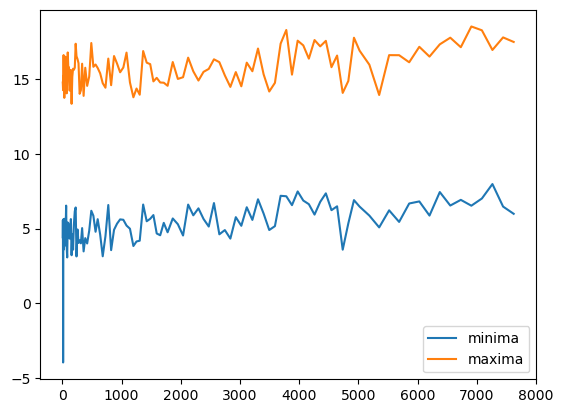

In [28]:
est3['minima'].plot(kind='line', legend=True), est3['maxima'].plot(kind='line', legend=True)

In [29]:
est2 = df2[df2['estacion']=='SP000008280']

(<Axes: >, <Axes: >)

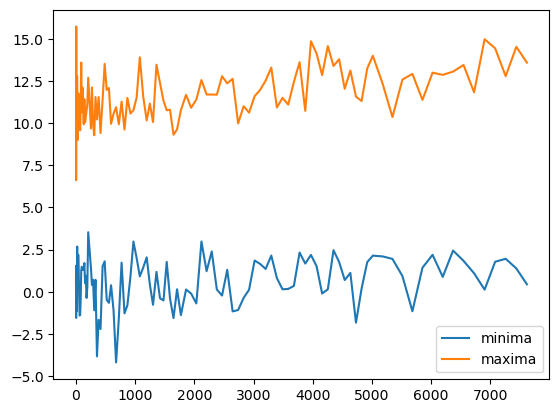

In [30]:
est2['minima'].plot(kind='line', legend=True), est2['maxima'].plot(kind='line', legend=True)

In [31]:
est4 = df3[df3['estacion']=='SP000009981']

(<Axes: >, <Axes: >)

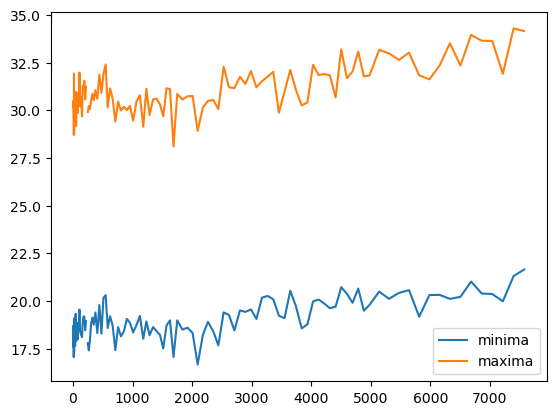

In [32]:
est4['minima'].plot(kind='line', legend=True), est4['maxima'].plot(kind='line', legend=True)

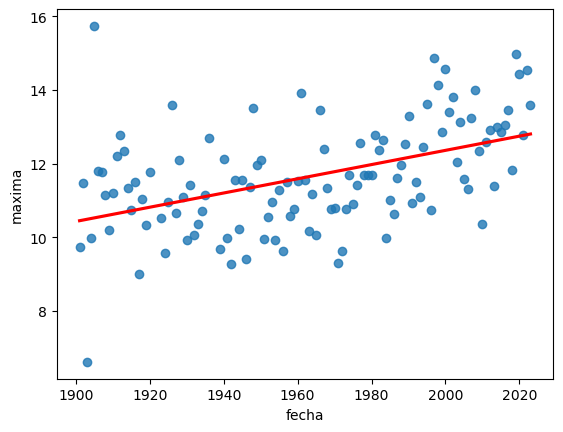

In [33]:
import seaborn as sns

ax = sns.regplot(x='fecha', y='maxima', data=est2, ci=None, line_kws={'color':'red'})

In [34]:
df

,estacion,fecha,maxima,minima,precip,nevada,profun_nieve,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin,estac
0,SP000003195,1920-01-01,11.9,8.8,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
1,SP000003195,1920-01-02,11.0,2.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
2,SP000003195,1920-01-03,8.6,2.4,14.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
3,SP000003195,1920-01-04,6.8,2.5,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
4,SP000003195,1920-01-05,6.6,1.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102150,SPW00014011,2000-01-13,7.3,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,invierno
3102151,SPW00014011,2002-02-14,11.2,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,invierno
3102152,SPW00014011,2004-06-27,38.7,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,verano
3102153,SPW00014011,2004-09-27,28.0,NaN,NaN,NaN,NaN,40.4833,-3.4500,608.1,TORREJON,1957,2005,otoño


In [35]:
df.sort_values(by='fecha')

,estacion,fecha,maxima,minima,precip,nevada,profun_nieve,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin,estac
2550348,SPE00155329,1896-11-01,15.5,4.0,0.0,NaN,NaN,41.9800,2.8253,95.0,GIRONA (ANTIC INSTITUT),1896,1966,otoño
2550349,SPE00155329,1896-11-02,8.0,6.5,80.0,NaN,NaN,41.9800,2.8253,95.0,GIRONA (ANTIC INSTITUT),1896,1966,otoño
2550350,SPE00155329,1896-11-03,12.5,3.0,0.0,NaN,NaN,41.9800,2.8253,95.0,GIRONA (ANTIC INSTITUT),1896,1966,otoño
2550351,SPE00155329,1896-11-04,9.0,7.0,225.0,NaN,NaN,41.9800,2.8253,95.0,GIRONA (ANTIC INSTITUT),1896,1966,otoño
2550352,SPE00155329,1896-11-05,13.0,5.0,0.0,NaN,NaN,41.9800,2.8253,95.0,GIRONA (ANTIC INSTITUT),1896,1966,otoño
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022116,SPM00008359,2023-12-04,15.3,6.0,0.0,NaN,NaN,38.3670,-0.5000,82.0,ALICANTE,1976,2023,otoño
297766,SP000008280,2023-12-04,NaN,NaN,10.0,NaN,NaN,38.9519,-1.8631,704.0,ALBACETE LOS LLANOS,1901,2023,otoño
3019208,SPM00008284,2023-12-04,NaN,NaN,5.0,NaN,NaN,39.4890,-0.4820,68.6,VALENCIA,1973,2023,otoño
1511700,SPE00120197,2023-12-04,NaN,17.7,0.0,NaN,NaN,28.4444,-13.8631,25.0,FUERTEVENTURA/AEROPUERTO,1959,2023,otoño


In [36]:
estaciones = df.estacion.unique()

In [37]:
estaciones

array(['SP000003195', 'SP000004452', 'SP000006155', 'SP000007038',
       'SP000008027', 'SP000008181', 'SP000008202', 'SP000008215',
       'SP000008280', 'SP000008410', 'SP000008416', 'SP000009434',
       'SP000009981', 'SP000060010', 'SP000060040', 'SP000060338',
       'SPE00101035', 'SPE00101043', 'SPE00119711', 'SPE00119720',
       'SPE00119729', 'SPE00119738', 'SPE00119747', 'SPE00119756',
       'SPE00119774', 'SPE00119783', 'SPE00119792', 'SPE00119801',
       'SPE00119819', 'SPE00119828', 'SPE00119837', 'SPE00119846',
       'SPE00119855', 'SPE00119864', 'SPE00119882', 'SPE00119909',
       'SPE00119918', 'SPE00119936', 'SPE00119945', 'SPE00119954',
       'SPE00119963', 'SPE00119972', 'SPE00119981', 'SPE00119990',
       'SPE00119999', 'SPE00120008', 'SPE00120017', 'SPE00120026',
       'SPE00120035', 'SPE00120044', 'SPE00120062', 'SPE00120080',
       'SPE00120089', 'SPE00120107', 'SPE00120116', 'SPE00120125',
       'SPE00120134', 'SPE00120143', 'SPE00120152', 'SPE001201

In [124]:
anual = df.groupby(df['año']).agg({'maxima': 'mean', 'minima': 'mean'})
anual = anual.reset_index()
anual

,año,maxima,minima
0,1896,12.516393,4.672131
1,1897,22.123014,11.687671
2,1898,21.899452,11.217808
3,1899,17.921348,7.350000
4,1901,20.067857,8.632873
...,...,...,...
122,2019,20.968157,10.316304
123,2020,20.391019,9.935682
124,2021,19.909328,9.520336
125,2022,21.433784,10.539842


In [38]:
#df['mes'] = df['fecha'].dt.month  # Crear una nueva columna 'mes' que represente el mes

# Realizar el groupby por estación y mes, y calcular las medias de 'maxima' y 'minima'
resultado = df.groupby(['estacion', df['fecha'].dt.month]).agg({'maxima': 'mean', 'minima': 'mean'})
resultado

maxima     minima
estacion    fecha                      
SP000003195 1       9.347448   2.223395
            2      11.530298   3.086785
            3      15.144624   5.439059
            4      18.084019   7.410107
            5      22.081075  10.886992
...                      ...        ...
SPW00014011 8      31.195806  15.524194
            9      26.703322  13.017333
            10     19.317647   8.716471
            11     12.791818   3.734242
            12      9.373314   0.920000

[2484 rows x 2 columns]

In [39]:
resultado.reset_index()

,estacion,fecha,maxima,minima
0,SP000003195,1,9.347448,2.223395
1,SP000003195,2,11.530298,3.086785
2,SP000003195,3,15.144624,5.439059
3,SP000003195,4,18.084019,7.410107
4,SP000003195,5,22.081075,10.886992
...,...,...,...,...
2479,SPW00014011,8,31.195806,15.524194
2480,SPW00014011,9,26.703322,13.017333
2481,SPW00014011,10,19.317647,8.716471
2482,SPW00014011,11,12.791818,3.734242


(<Axes: >, <Axes: >)

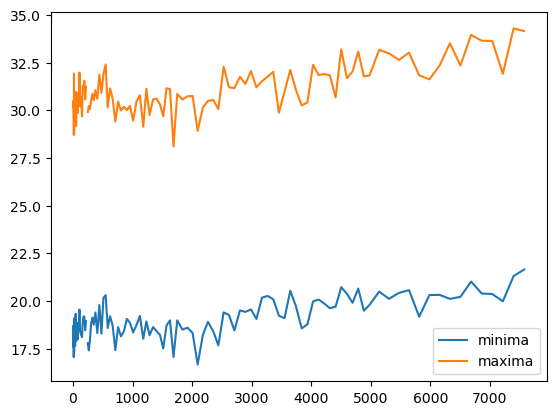

In [40]:
est4['minima'].plot(kind='line', legend=True), est4['maxima'].plot(kind='line', legend=True)

In [41]:
"""import matplotlib.pyplot as plt

# Iterar a través de cada grupo (estación) y crear un gráfico para cada uno
for estacion, data in resultado.groupby('estacion'):
    plt.figure()  # Crear una nueva figura para cada gráfico
    plt.plot(data.index.get_level_values(1), data['maxima'], label='Temperatura máxima')
    plt.plot(data.index.get_level_values(1), data['minima'], label='Temperatura mínima')
    plt.title(f'Progresión de temperaturas para la estación {estacion}')
    plt.xlabel('Mes')
    plt.ylabel('Temperatura')
    plt.legend()
    plt.show()"""

"import matplotlib.pyplot as plt\n\n# Iterar a través de cada grupo (estación) y crear un gráfico para cada uno\nfor estacion, data in resultado.groupby('estacion'):\n    plt.figure()  # Crear una nueva figura para cada gráfico\n    plt.plot(data.index.get_level_values(1), data['maxima'], label='Temperatura máxima')\n    plt.plot(data.index.get_level_values(1), data['minima'], label='Temperatura mínima')\n    plt.title(f'Progresión de temperaturas para la estación {estacion}')\n    plt.xlabel('Mes')\n    plt.ylabel('Temperatura')\n    plt.legend()\n    plt.show()"

In [42]:
df['año'] = df['fecha'].dt.year

In [43]:
df['mes'] = df['fecha'].dt.month

In [101]:
df[df['año']==2020]

,estacion,fecha,maxima,minima,precip,nevada,profun_nieve,latitud,longitud,altitud,localizacion,fecha_inicio,fecha_fin,estac,año,mes
36492,SP000003195,2020-01-01,11.2,1.9,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno,2020,1
36493,SP000003195,2020-01-02,10.5,1.6,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno,2020,1
36494,SP000003195,2020-01-03,6.0,1.5,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno,2020,1
36495,SP000003195,2020-01-04,11.2,2.8,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno,2020,1
36496,SP000003195,2020-01-05,10.9,1.5,0.0,NaN,NaN,40.4117,-3.6781,667.0,MADRID - RETIRO,1920,2023,invierno,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096235,SPW00014010,2020-12-27,NaN,NaN,0.0,NaN,NaN,41.6667,-1.0333,263.0,ZARAGOZA,1957,2023,invierno,2020,12
3096236,SPW00014010,2020-12-28,NaN,NaN,56.0,NaN,NaN,41.6667,-1.0333,263.0,ZARAGOZA,1957,2023,invierno,2020,12
3096237,SPW00014010,2020-12-29,10.0,NaN,3.0,NaN,NaN,41.6667,-1.0333,263.0,ZARAGOZA,1957,2023,invierno,2020,12
3096238,SPW00014010,2020-12-30,NaN,NaN,0.0,NaN,NaN,41.6667,-1.0333,263.0,ZARAGOZA,1957,2023,invierno,2020,12


In [51]:
df.shape

(3102155, 16)

In [112]:
maxi_1 = df.groupby('mes').agg({'maxima':'max'})
maxi_2 = df.groupby('mes').agg({'minima':'max'})
mini_1 = df.groupby('mes').agg({'maxima':'min'})
mini_2 = df.groupby('mes').agg({'minima':'min'})
maxi_1,maxi_2,mini_1,mini_2

(     maxima
 mes        
 1      31.6
 2      38.6
 3      37.7
 4      38.8
 5      42.6
 6      45.2
 7      46.9
 8      47.2
 9      45.4
 10     41.4
 11     36.2
 12     32.4,
      minima
 mes        
 1      22.0
 2      23.9
 3      28.5
 4      27.6
 5      26.4
 6      29.1
 7      33.2
 8      31.8
 9      29.0
 10     28.2
 11     25.0
 12     22.7,
      maxima
 mes        
 1     -15.6
 2     -19.6
 3     -14.3
 4     -13.0
 5      -7.2
 6      -5.3
 7       0.0
 8       0.0
 9      -1.6
 10     -9.9
 11    -11.6
 12    -15.8,
      minima
 mes        
 1     -28.2
 2     -23.2
 3     -20.8
 4     -15.9
 5     -12.4
 6      -9.2
 7      -1.8
 8      -2.6
 9      -7.7
 10    -14.4
 11    -15.9
 12    -30.0)

In [113]:
idx = df.groupby('mes')['maxima'].idxmax()
maxi_1 = df.loc[idx, ['fecha', 'maxima']]

In [114]:
idx = df.groupby('mes')['minima'].idxmax()
maxi_2 = df.loc[idx, ['fecha', 'minima']]

In [115]:
idx = df.groupby('mes')['maxima'].idxmin()
mini_1 = df.loc[idx, ['fecha', 'maxima']]

In [116]:
idx = df.groupby('mes')['minima'].idxmin()
mini_2 = df.loc[idx, ['fecha', 'minima']]

In [78]:
maxi_1.rename(columns={'maxima':'max_maxima'}, inplace=True)
maxi_2.rename(columns={'minima':'max_minima'}, inplace=True)
mini_1.rename(columns={'maxima':'min_maxima'}, inplace=True) 
mini_2.rename(columns={'minima':'min_minima'}, inplace=True)

In [117]:
maxi_1, maxi_2, mini_1, mini_2

(             fecha  maxima
 2998085 2016-01-09    31.6
 256799  1905-02-10    38.6
 2101175 2023-03-30    37.7
 321175  2023-04-27    38.8
 482175  2015-05-13    42.6
 2168236 1965-06-27    45.2
 319061  2017-07-13    46.9
 3068463 1982-08-19    47.2
 318751  2016-09-06    45.4
 124512  2013-10-03    41.4
 1523004 1997-11-05    36.2
 2773297 2016-12-09    32.4,
              fecha  minima
 2086117 1982-01-06    22.0
 2100044 2020-02-23    23.9
 256117  1902-03-31    28.5
 2093529 2002-04-23    27.6
 2093924 2003-05-23    26.4
 480753  2011-06-21    29.1
 717507  2001-07-31    33.2
 506835  2020-08-02    31.8
 2087822 1986-09-07    29.0
 2086765 1983-10-16    28.2
 1507667 2012-11-03    25.0
 2016928 2010-12-05    22.7,
              fecha  maxima
 2610738 2010-01-09   -15.6
 2658394 2012-02-04   -19.6
 2610063 2008-03-05   -14.3
 2895614 2022-04-02   -13.0
 2657753 2010-05-04    -7.2
 2614050 2019-06-04    -5.3
 271315  1951-07-04     0.0
 175645  1961-08-01     0.0
 2895062 2020-09-2

In [118]:
df[df['año']>2000].shape

(1233044, 16)

In [82]:
resultado2 = df.groupby(['estacion', df['año'], df['mes']]).agg({'maxima': 'mean', 'minima': 'mean'})

In [104]:
def asignar_estacion(mes):
    if mes in [1, 2, 3]:
        return 'invierno'
    elif mes in [4, 5, 6]:
        return 'primavera'
    elif mes in [7, 8, 9]:
        return 'verano'
    else:
        return 'otoño'

# Aplicar la función para crear la nueva columna 'estacion'
resultado2['estac'] = resultado2['mes'].apply(asignar_estacion)
resultado2

,estacion,año,mes,maxima,minima,estac
0,SP000003195,1920,1,10.30,2.15,invierno
1,SP000003195,1920,2,11.87,3.69,invierno
2,SP000003195,1920,3,14.87,5.00,invierno
3,SP000003195,1920,4,18.91,7.60,primavera
4,SP000003195,1920,5,24.96,12.01,primavera
...,...,...,...,...,...,...
103435,SPW00014011,2000,1,7.30,NaN,invierno
103436,SPW00014011,2002,2,11.20,NaN,invierno
103437,SPW00014011,2004,6,38.70,NaN,primavera
103438,SPW00014011,2004,9,28.00,NaN,verano


In [93]:
resultado3 = df.groupby(['estacion', df['año'], df['estac']]).agg({'maxima': 'mean', 'minima': 'mean'})

In [94]:
resultado3

maxima     minima
estacion    año  estac                          
SP000003195 1920 invierno   11.405495   3.374725
                 otoño      13.058427   5.787640
                 primavera  22.147826  10.028261
                 verano     30.138298  16.470213
            1921 invierno   10.418889   1.836667
...                               ...        ...
SPW00014011 2000 invierno    7.300000        NaN
            2002 invierno   11.200000        NaN
            2004 otoño      28.000000        NaN
                 verano     38.700000        NaN
            2005 otoño      14.000000        NaN

[34909 rows x 2 columns]

In [83]:
resultado2

maxima     minima
estacion    año  mes                      
SP000003195 1920 1    10.296774   2.151613
                 2    11.868966   3.693103
                 3    14.870968   5.000000
                 4    18.913333   7.600000
                 5    24.964516  12.006452
...                         ...        ...
SPW00014011 2000 1     7.300000        NaN
            2002 2    11.200000        NaN
            2004 6    38.700000        NaN
                 9    28.000000        NaN
            2005 12   14.000000        NaN

[103440 rows x 2 columns]

In [84]:
resultado2.reset_index(inplace=True)
resultado2

,estacion,año,mes,maxima,minima
0,SP000003195,1920,1,10.296774,2.151613
1,SP000003195,1920,2,11.868966,3.693103
2,SP000003195,1920,3,14.870968,5.000000
3,SP000003195,1920,4,18.913333,7.600000
4,SP000003195,1920,5,24.964516,12.006452
...,...,...,...,...,...
103435,SPW00014011,2000,1,7.300000,NaN
103436,SPW00014011,2002,2,11.200000,NaN
103437,SPW00014011,2004,6,38.700000,NaN
103438,SPW00014011,2004,9,28.000000,NaN


In [85]:
resultado2.estacion.value_counts()

estacion
SP000009981    1428
SP000008280    1387
SP000060010    1260
SP000003195    1245
SPE00120629    1241
               ... 
SPE00173105      90
SPE00175681      78
SPE00175559      24
SPE00175568      18
SPM00008420      18
Name: count, Length: 207, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

estacion_data = resultado2[resultado2['estacion']=='SP000009981'].sort_values(by='año')

enero_data = estacion_data[estacion_data['mes'] == 1]

# Crear un gráfico de líneas para las temperaturas máximas y mínimas de enero
plt.figure(figsize=(12, 6))  # Ajustar tamaño del gráfico
plt.plot(enero_data.index, enero_data['maxima'], label='Temperatura Máxima')
plt.plot(enero_data.index, enero_data['minima'], label='Temperatura Mínima')

# Etiquetas y leyenda del gráfico
plt.xlabel('Día de Enero')
plt.ylabel('Temperatura')
plt.title('Temperaturas Máximas y Mínimas en Enero')
plt.legend()
plt.show()

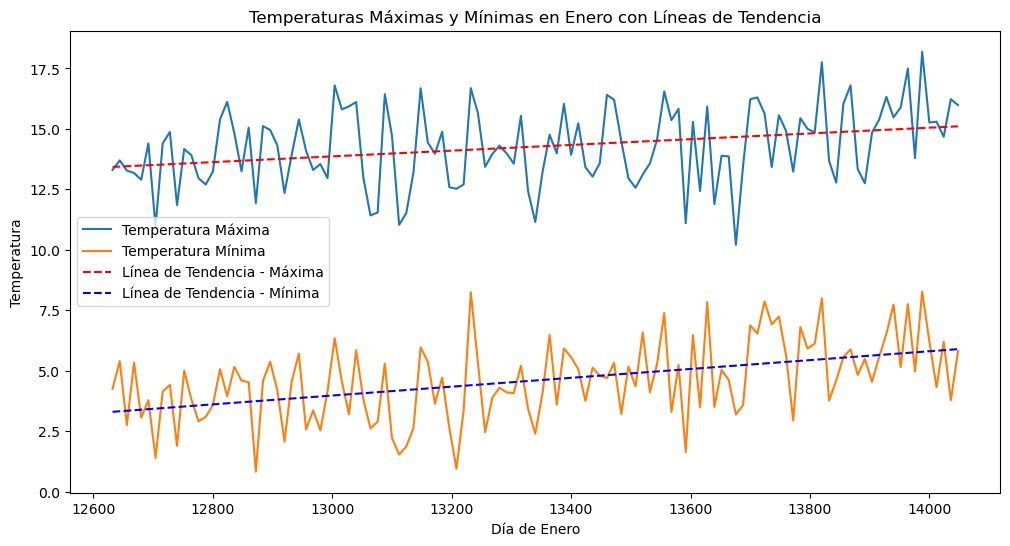

In [87]:
estacion_data = resultado2[resultado2['estacion']=='SP000009981'].sort_values(by='año')

enero_data = estacion_data[estacion_data['mes'] == 1]

plt.figure(figsize=(12, 6))  # Ajustar tamaño del gráfico
plt.plot(enero_data.index, enero_data['maxima'], label='Temperatura Máxima')
plt.plot(enero_data.index, enero_data['minima'], label='Temperatura Mínima')

# Ajustar una línea de tendencia lineal a los datos de temperaturas máximas
params_max = np.polyfit(enero_data.index, enero_data['maxima'], 1)
linea_tendencia_max = np.polyval(params_max, enero_data.index)

# Ajustar una línea de tendencia lineal a los datos de temperaturas mínimas
params_min = np.polyfit(enero_data.index, enero_data['minima'], 1)
linea_tendencia_min = np.polyval(params_min, enero_data.index)

# Graficar las líneas de tendencia
plt.plot(enero_data.index, linea_tendencia_max, color='red', linestyle='--', label='Línea de Tendencia - Máxima')
plt.plot(enero_data.index, linea_tendencia_min, color='blue', linestyle='--', label='Línea de Tendencia - Mínima')

# Etiquetas y leyenda del gráfico
plt.xlabel('Día de Enero')
plt.ylabel('Temperatura')
plt.title('Temperaturas Máximas y Mínimas en Enero con Líneas de Tendencia')
plt.legend()
plt.show()

In [88]:
resultado2['maxima'] = resultado2['maxima'].round(2)
resultado2['minima'] = resultado2['minima'].round(2)

In [89]:
df['maxima'] = df['maxima'].round(2)
df['minima'] = df['minima'].round(2)

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_31352\2432873868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maxima'] = df['maxima'].round(2)
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_31352\2432873868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minima'] = df['minima'].round(2)


In [90]:
a = resultado2[resultado2['mes']==1]
b = resultado2[resultado2['mes']==2]
c = resultado2[resultado2['mes']==3]
d = resultado2[resultado2['mes']==4]
e = resultado2[resultado2['mes']==5]
f = resultado2[resultado2['mes']==6]
g = resultado2[resultado2['mes']==7]
h = resultado2[resultado2['mes']==8]
i = resultado2[resultado2['mes']==9]
j = resultado2[resultado2['mes']==10]
k = resultado2[resultado2['mes']==11]
l = resultado2[resultado2['mes']==12]

In [92]:
a

,estacion,año,mes,maxima,minima
0,SP000003195,1920,1,10.30,2.15
12,SP000003195,1921,1,9.40,1.13
24,SP000003195,1922,1,9.25,1.01
36,SP000003195,1923,1,8.78,-0.59
48,SP000003195,1924,1,8.82,2.12
...,...,...,...,...,...
103364,SPW00014011,1980,1,NaN,NaN
103387,SPW00014011,1982,1,NaN,NaN
103409,SPW00014011,1984,1,NaN,NaN
103423,SPW00014011,1998,1,NaN,NaN


In [105]:
inv = resultado2[resultado2['estac']=='invierno']
pri = resultado2[resultado2['estac']=='primavera']
ver = resultado2[resultado2['estac']=='verano']
oto = resultado2[resultado2['estac']=='otoño']

In [106]:
ver

,estacion,año,mes,maxima,minima,estac
6,SP000003195,1920,7,31.11,16.54,verano
7,SP000003195,1920,8,31.13,16.83,verano
8,SP000003195,1920,9,25.36,13.43,verano
18,SP000003195,1921,7,31.36,17.33,verano
19,SP000003195,1921,8,29.30,16.33,verano
...,...,...,...,...,...,...
103419,SPW00014011,1997,9,NaN,NaN,verano
103429,SPW00014011,1998,7,NaN,NaN,verano
103430,SPW00014011,1998,8,NaN,NaN,verano
103431,SPW00014011,1998,9,NaN,NaN,verano


In [ ]:
.

In [107]:
inv.to_csv('invierno.csv', index=False)
pri.to_csv('primavera.csv', index=False)
ver.to_csv('verano.csv', index=False)
oto.to_csv('otoño.csv', index=False)

In [125]:
anual.to_csv('anual.csv', index=False)

In [ ]:
resultado2.to_csv('temp_meses.csv', index=False)

In [ ]:
a.to_csv('ene.csv', index=False)
b.to_csv('feb.csv', index=False)
c.to_csv('mar.csv', index=False)
d.to_csv('abr.csv', index=False)
e.to_csv('may.csv', index=False)
f.to_csv('jun.csv', index=False)
g.to_csv('jul.csv', index=False)
h.to_csv('ago.csv', index=False)
i.to_csv('sep.csv', index=False)
j.to_csv('oct.csv', index=False)
k.to_csv('nov.csv', index=False)
l.to_csv('dic.csv', index=False)

In [80]:
maxi_1.to_csv('max_maxima.csv', index=False)
maxi_2.to_csv('max_minima.csv', index=False)
mini_1.to_csv('min_maxima.csv', index=False)
mini_2.to_csv('min_minima.csv', index=False)